# Super Store Sales and Profit Analysis

Importing the Libraries

In [1]:
import numpy as np
import pandas as pd

Reading the .csv file

In [2]:
data=pd.read_csv("SuperStore_Sales_Dataset.csv")
data.head(3)

,Row ID+O6G3A1:R6,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Profit,Returns,Payment Mode,ind1,ind2
0,4918,CA-2019-160304,01-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",73.94,1,28.2668,NaN,Online,NaN,NaN
1,4919,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Furniture,Bookcases,"Bush Westfield Collection Bookcases, Medium Ch...",173.94,3,38.2668,NaN,Online,NaN,NaN
2,4920,CA-2019-160304,02-01-2019,07-01-2019,Standard Class,BM-11575,Brendan Murry,Corporate,United States,Gaithersburg,...,Technology,Phones,GE 30522EE2,231.98,2,67.2742,NaN,Cards,NaN,NaN


Displaying the Shape of the .csv file.

In [3]:
data.shape

(5901, 23)

Displaying the info of the file

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Order ID          5901 non-null   object 
 2   Order Date        5901 non-null   object 
 3   Ship Date         5901 non-null   object 
 4   Ship Mode         5901 non-null   object 
 5   Customer ID       5901 non-null   object 
 6   Customer Name     5901 non-null   object 
 7   Segment           5901 non-null   object 
 8   Country           5901 non-null   object 
 9   City              5901 non-null   object 
 10  State             5901 non-null   object 
 11  Region            5901 non-null   object 
 12  Product ID        5901 non-null   object 
 13  Category          5901 non-null   object 
 14  Sub-Category      5901 non-null   object 
 15  Product Name      5901 non-null   object 
 16  Sales             5901 non-null   float64


Describing the dataset

In [5]:
data.describe()

,Row ID+O6G3A1:R6,Sales,Quantity,Profit,Returns,ind1,ind2
count,5901.000000,5901.000000,5901.000000,5901.000000,287.0,0.0,0.0
mean,5022.422471,265.345589,3.781901,29.700408,1.0,NaN,NaN
std,2877.977184,474.260645,2.212917,259.589138,0.0,NaN,NaN
min,1.000000,0.836000,1.000000,-6599.978000,1.0,NaN,NaN
25%,2486.000000,71.976000,2.000000,1.795500,1.0,NaN,NaN
50%,5091.000000,128.648000,3.000000,8.502500,1.0,NaN,NaN
75%,7456.000000,265.170000,5.000000,28.615000,1.0,NaN,NaN
max,9994.000000,9099.930000,14.000000,8399.976000,1.0,NaN,NaN


Count the total number of Nul Values present in every column

In [6]:
data.isna().sum()

Row ID+O6G3A1:R6       0
Order ID               0
Order Date             0
Ship Date              0
Ship Mode              0
Customer ID            0
Customer Name          0
Segment                0
Country                0
City                   0
State                  0
Region                 0
Product ID             0
Category               0
Sub-Category           0
Product Name           0
Sales                  0
Quantity               0
Profit                 0
Returns             5614
Payment Mode           0
ind1                5901
ind2                5901
dtype: int64

 # Data Cleaning & Analysis of Co-Relation 

Delete the Columns who have Null Value

In [7]:
data=data.drop(columns=['Returns','ind1','ind2'],axis=1)
data.head

<bound method NDFrame.head of       Row ID+O6G3A1:R6        Order ID  Order Date   Ship Date  \
0                 4918  CA-2019-160304  01-01-2019  07-01-2019   
1                 4919  CA-2019-160304  02-01-2019  07-01-2019   
2                 4920  CA-2019-160304  02-01-2019  07-01-2019   
3                 3074  CA-2019-125206  03-01-2019  05-01-2019   
4                 8604  US-2019-116365  03-01-2019  08-01-2019   
...                ...             ...         ...         ...   
5896               907  CA-2020-143259  30-12-2020  03-01-2021   
5897              1297  CA-2020-115427  30-12-2020  03-01-2021   
5898              5092  CA-2020-156720  30-12-2020  03-01-2021   
5899               909  CA-2020-143259  30-12-2020  03-01-2021   
5900              5093  CA-2020-151450  31-12-2020  04-01-2021   

           Ship Mode Customer ID      Customer Name    Segment        Country  \
0     Standard Class    BM-11575      Brendan Murry  Corporate  United States   
1     Standard 

In [8]:
data.columns

Index(['Row ID+O6G3A1:R6', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Profit', 'Payment Mode'],
      dtype='object')

Delete the unnecessay columns.

In [9]:
df=data.drop(columns=['Order ID','Customer ID','Customer Name','Order Date','Ship Date','Product ID','Product Name'],axis=1)
df.head(1)

,Row ID+O6G3A1:R6,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Profit,Payment Mode
0,4918,Standard Class,Corporate,United States,Gaithersburg,Maryland,East,Furniture,Bookcases,73.94,1,28.2668,Online


In [10]:
df.shape

(5901, 13)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5901 entries, 0 to 5900
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row ID+O6G3A1:R6  5901 non-null   int64  
 1   Ship Mode         5901 non-null   object 
 2   Segment           5901 non-null   object 
 3   Country           5901 non-null   object 
 4   City              5901 non-null   object 
 5   State             5901 non-null   object 
 6   Region            5901 non-null   object 
 7   Category          5901 non-null   object 
 8   Sub-Category      5901 non-null   object 
 9   Sales             5901 non-null   float64
 10  Quantity          5901 non-null   int64  
 11  Profit            5901 non-null   float64
 12  Payment Mode      5901 non-null   object 
dtypes: float64(2), int64(2), object(9)
memory usage: 599.4+ KB


In [12]:
df.describe()

,Row ID+O6G3A1:R6,Sales,Quantity,Profit
count,5901.000000,5901.000000,5901.000000,5901.000000
mean,5022.422471,265.345589,3.781901,29.700408
std,2877.977184,474.260645,2.212917,259.589138
min,1.000000,0.836000,1.000000,-6599.978000
25%,2486.000000,71.976000,2.000000,1.795500
50%,5091.000000,128.648000,3.000000,8.502500
75%,7456.000000,265.170000,5.000000,28.615000
max,9994.000000,9099.930000,14.000000,8399.976000


In [13]:
df=df.drop(columns='Row ID+O6G3A1:R6')
df.head(1)

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category,Sales,Quantity,Profit,Payment Mode
0,Standard Class,Corporate,United States,Gaithersburg,Maryland,East,Furniture,Bookcases,73.94,1,28.2668,Online


In [14]:
df.shape

(5901, 12)

Displaning the Co-relation.

In [15]:
df.corr()

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Sales,Quantity,Profit
Sales,1.000000,0.202420,0.325915
Quantity,0.202420,1.000000,0.074761
Profit,0.325915,0.074761,1.000000


C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\1696947183.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



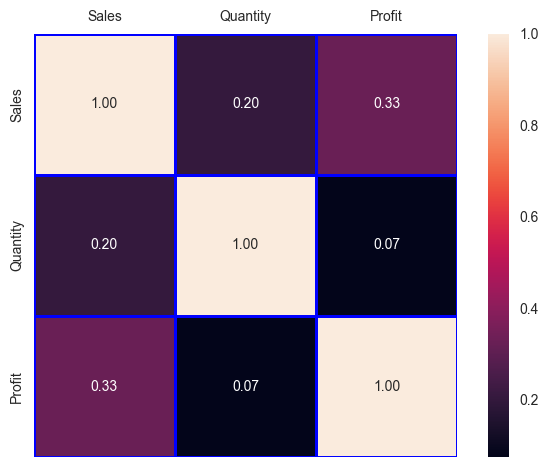

In [46]:
import seaborn as sns
ax=sns.heatmap(df.corr(),annot=True,cbar=True,square=True,linecolor="blue",linewidths=1,xticklabels="auto",yticklabels="auto",fmt=".2f")
ax.set(xlabel="", ylabel="")
ax.xaxis.tick_top()

# Top 10 States by most Sales and Profit

In [48]:
Top_10_Sales = df.groupby("State").Sales.sum().nlargest(n =10)
Top_10_Profits = df.groupby("State").Profit.sum().nlargest(n =10)
print(Top_10_Sales.index)
print(Top_10_Profits.index)

Index(['California', 'New York', 'Texas', 'Washington', 'Pennsylvania', 'Ohio',
       'Illinois', 'Florida', 'Michigan', 'North Carolina'],
      dtype='object', name='State')
Index(['California', 'New York', 'Washington', 'Michigan', 'Indiana',
       'Georgia', 'Virginia', 'New Jersey', 'Delaware', 'Kentucky'],
      dtype='object', name='State')


C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\1325209980.py:2: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



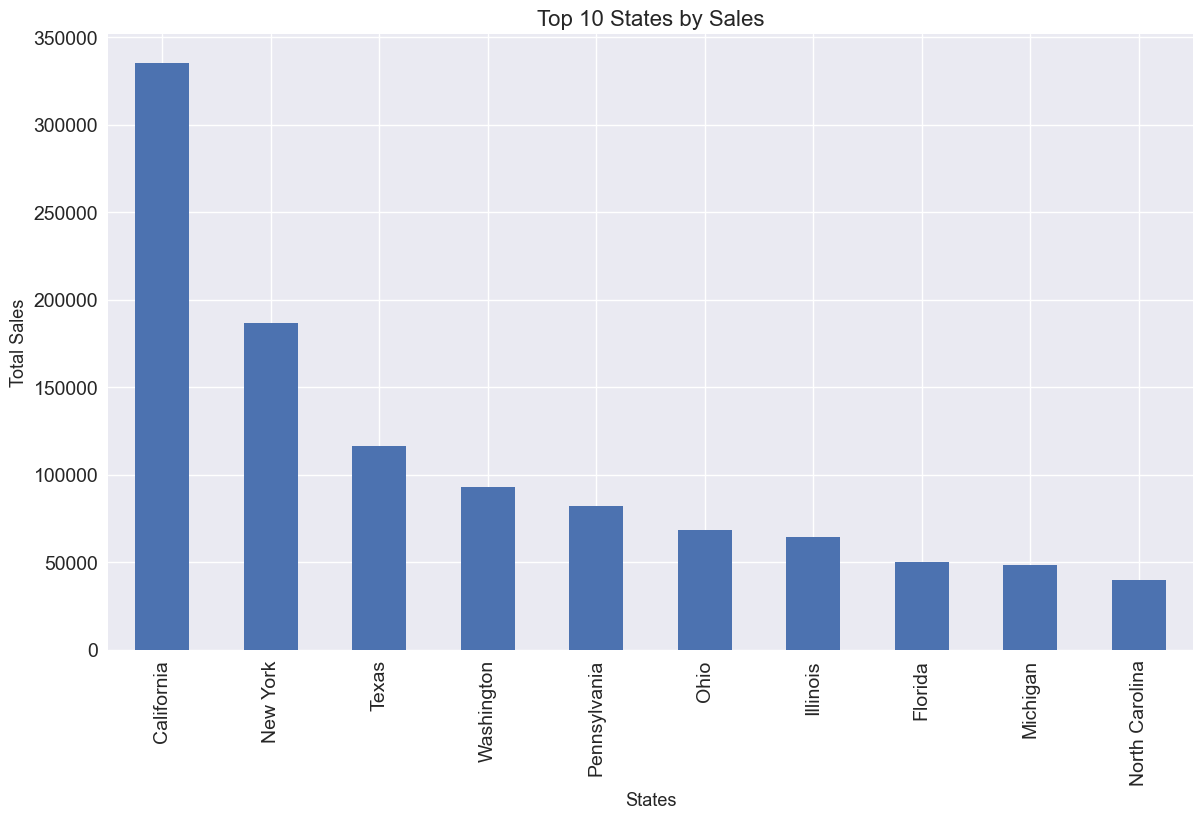

In [54]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
Top_10_Sales.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 States by Sales",fontsize =16)
plt.show()

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\4247220716.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



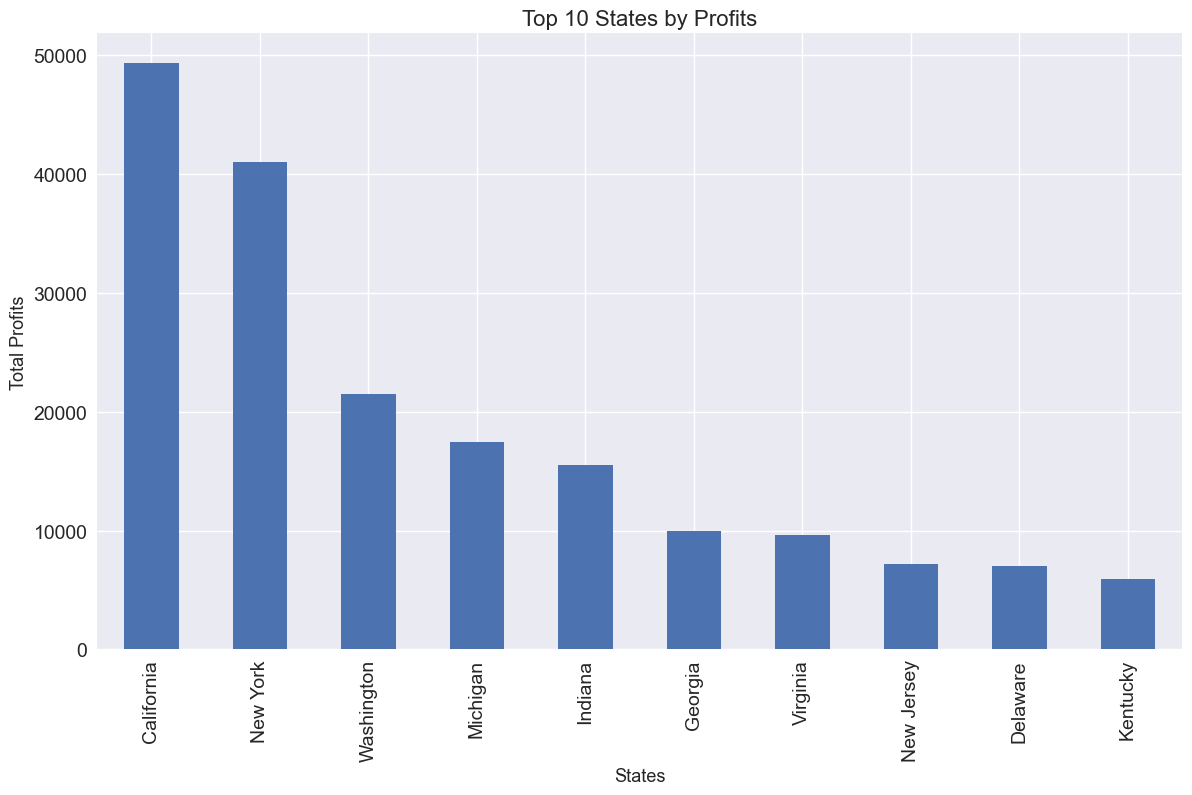

In [59]:
plt.style.use('seaborn')
Top_10_Profits.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("States", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 States by Profits",fontsize =16)
plt.show()

# Top 10 Cities by most Sales and Profit

In [56]:
Top_10_SellableCity = df.groupby("City").Sales.sum().nlargest(n =10)
Top_10_ProfitableCity = df.groupby("City").Profit.sum().nlargest(n =10)
print(Top_10_SellableCity.index)
print(Top_10_ProfitableCity.index)

Index(['New York City', 'Los Angeles', 'San Francisco', 'Seattle',
       'Philadelphia', 'Houston', 'Chicago', 'Columbus', 'San Diego',
       'Detroit'],
      dtype='object', name='City')
Index(['New York City', 'Los Angeles', 'Seattle', 'Detroit', 'San Francisco',
       'Lafayette', 'Jackson', 'Newark', 'Columbus', 'Providence'],
      dtype='object', name='City')


C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\1328320660.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



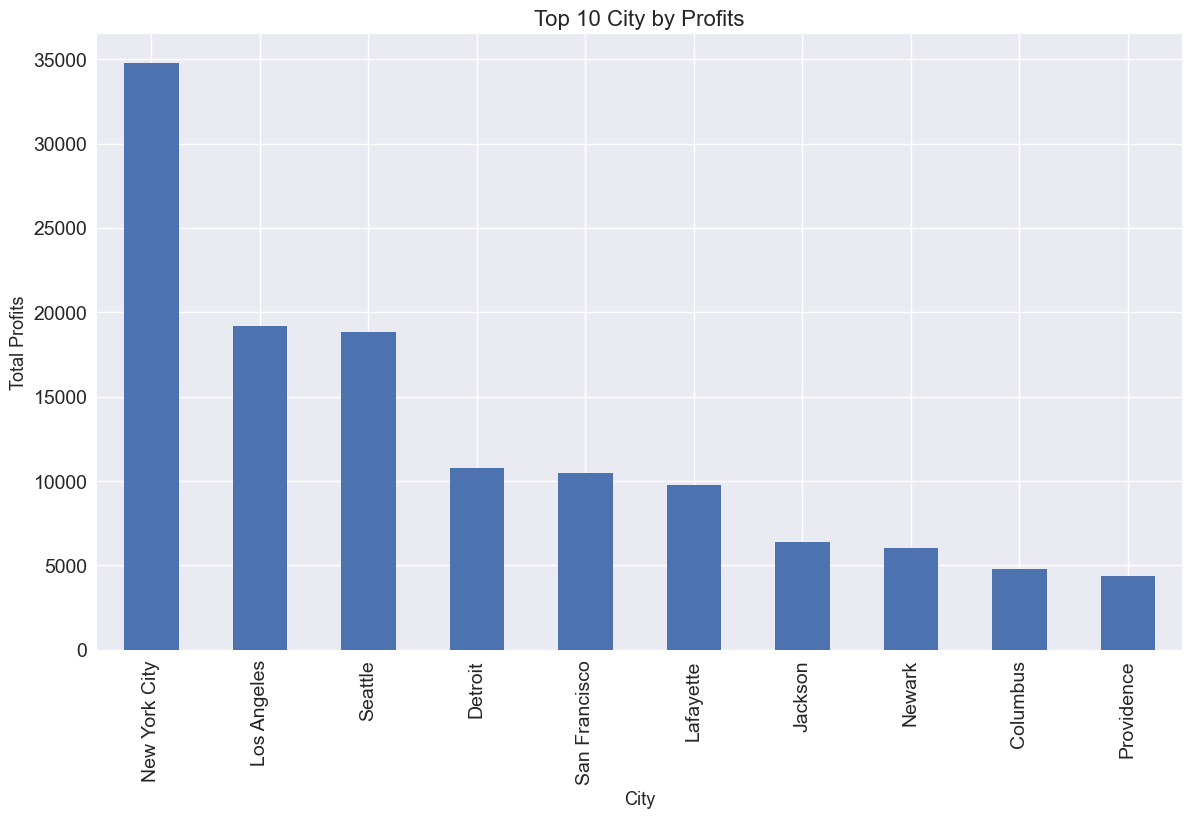

In [57]:
plt.style.use('seaborn')
Top_10_ProfitableCity.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("City", fontsize =13)
plt.ylabel("Total Profits",fontsize =13)
plt.title("Top 10 City by Profits",fontsize =16)
plt.show()

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\4230370042.py:1: MatplotlibDeprecationWarning:

The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.



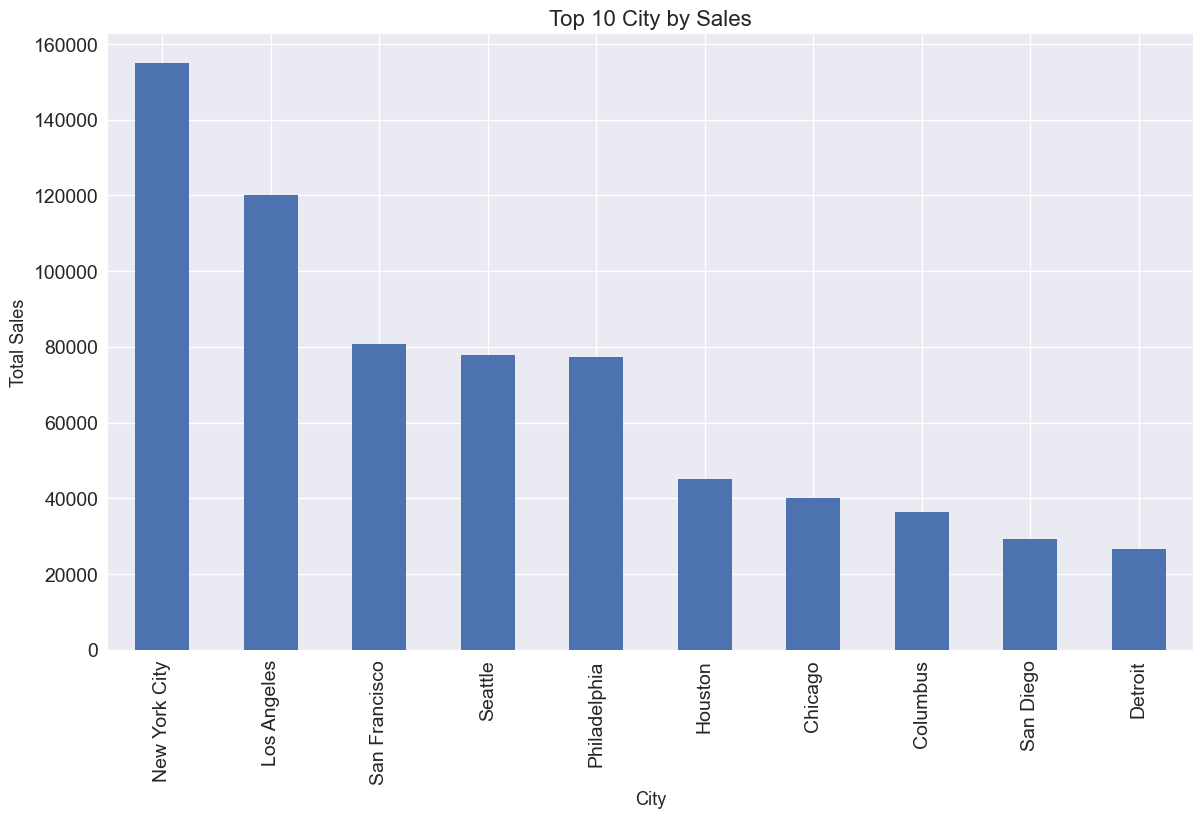

In [58]:
plt.style.use('seaborn')
Top_10_SellableCity.plot(kind ='bar', figsize =(14,8), fontsize =14)
plt.xlabel("City", fontsize =13)
plt.ylabel("Total Sales",fontsize =13)
plt.title("Top 10 City by Sales",fontsize =16)
plt.show()

# Analysis and Visualization of different region based on Sales and Profit  of those Region

In [66]:
df["Region"].value_counts()

West       1901
East       1688
Central    1381
South       931
Name: Region, dtype: int64

In [60]:
sales_profit_segment1 = df.groupby('Region').sum()[['Sales', 'Profit']]
sales_profit_segment1 = sales_profit_segment1.reset_index()
sales_profit_segment1

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\128495873.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Region,Sales,Profit
0,Central,341007.5242,27450.0071
1,East,450234.6660,53400.4243
2,South,252121.0810,26551.7163
3,West,522441.0520,67859.9582


<AxesSubplot: xlabel='Region'>

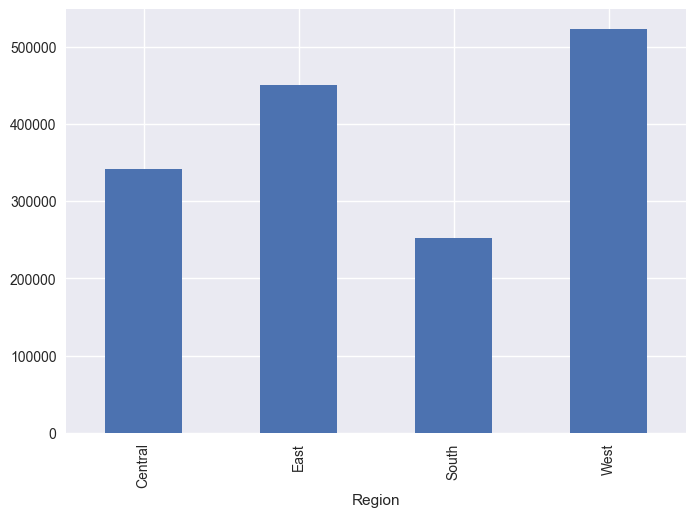

In [61]:
df.groupby("Region")["Sales"].sum().plot.bar()

<AxesSubplot: xlabel='Region'>

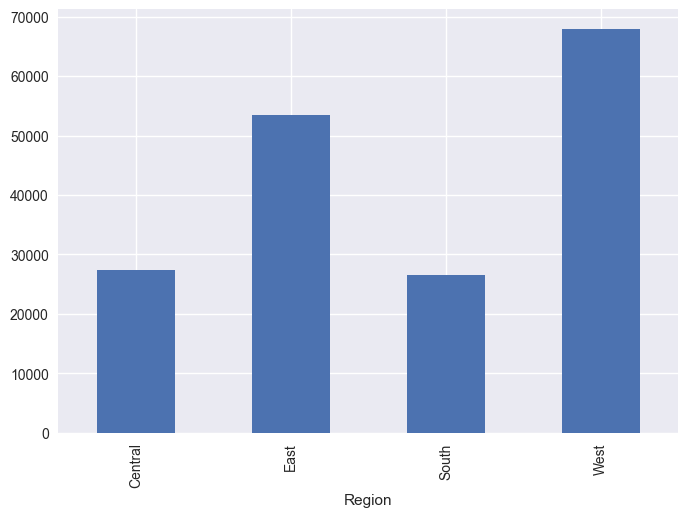

In [63]:
df.groupby("Region")["Profit"].sum().plot.bar()

<AxesSubplot: ylabel='Sales'>

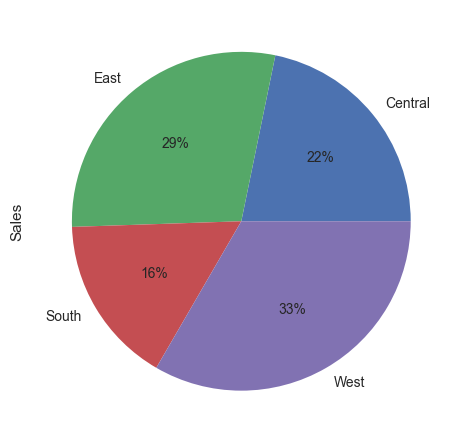

In [64]:
df.groupby("Region")["Sales"].sum().plot.pie(autopct="%1.0f%%")

<AxesSubplot: ylabel='Profit'>

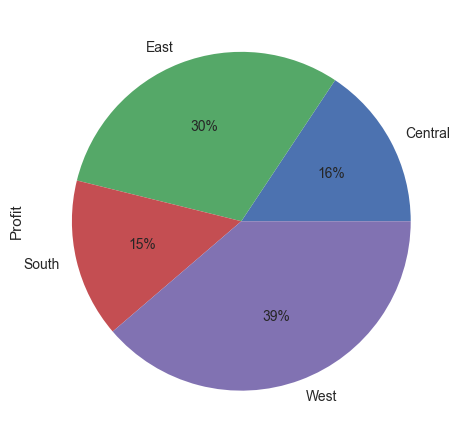

In [65]:
df.groupby("Region")["Profit"].sum().plot.pie(autopct="%1.0f%%")

# Which is the most profitable Sub-Category

In [67]:
df["Sub-Category"].unique()

array(['Bookcases', 'Phones', 'Storage', 'Accessories', 'Tables',
       'Binders', 'Copiers', 'Art', 'Furnishings', 'Paper', 'Envelopes',
       'Chairs', 'Fasteners', 'Appliances', 'Labels', 'Machines',
       'Supplies'], dtype=object)

In [70]:
sub_categories_info=pd.DataFrame(df.groupby("Sub-Category")["Profit"].sum())
sub_categories_info.reset_index(inplace=True)
sub_categories_profit=sub_categories_info.sort_values(by="Profit",ascending=False)
sub_categories_profit.head(10)

,Sub-Category,Profit
6,Copiers,42774.5828
0,Accessories,25336.6455
13,Phones,22308.9179
12,Paper,21112.3779
3,Binders,17885.3759
14,Storage,13607.0875
5,Chairs,13406.7032
1,Appliances,13166.6098
9,Furnishings,8034.4328
2,Art,3635.9257


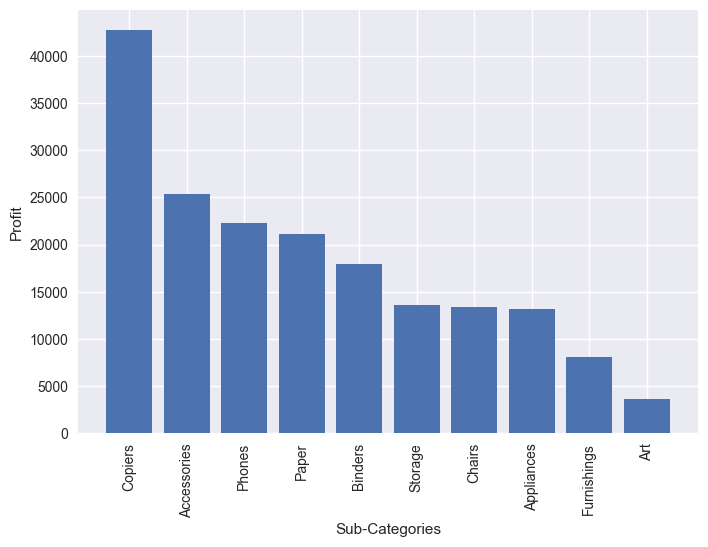

In [72]:
import matplotlib.pyplot as plt
plt.bar(sub_categories_profit["Sub-Category"].head(10),sub_categories_profit["Profit"].head(10))
plt.xticks(sub_categories_profit['Sub-Category'].head(10) , rotation = "vertical")
plt.xlabel("Sub-Categories")
plt.ylabel("Profit")
plt.show()

# Which Catageory Sales the most  

In [73]:
df["Category"].value_counts()

Office Supplies    3569
Furniture          1249
Technology         1083
Name: Category, dtype: int64

In [78]:
categories_sales=df.groupby("Category").sum()
categories_sales=categories_sales.sort_values(by='Sales',ascending=False)
categories_sales.reset_index(inplace=True)
categories_sales

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\3762033045.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Category,Sales,Quantity,Profit
0,Office Supplies,643707.6870,13625,74797.2461
1,Technology,470587.9910,4061,90458.2486
2,Furniture,451508.6452,4631,10006.6112


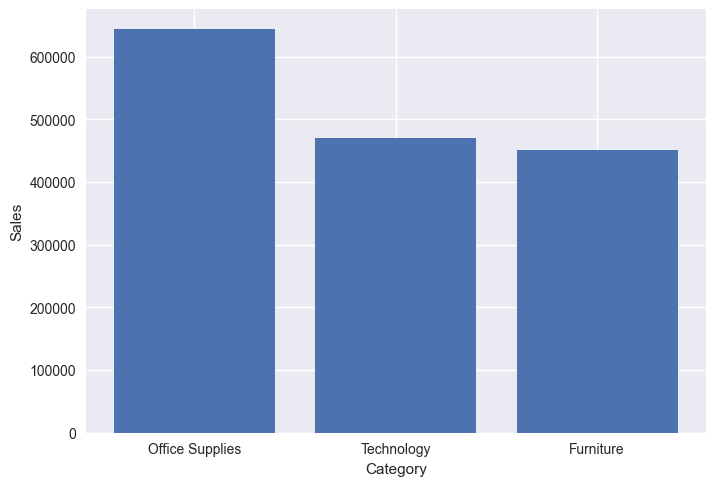

In [79]:
plt.bar(categories_sales["Category"], categories_sales['Sales'])
plt.xticks(categories_sales.index)
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

# Which is the most popular Sub-Category

In [81]:
popular_sub_category=pd.DataFrame(df.groupby("Sub-Category")["Quantity"].sum())
popular_sub_category=popular_sub_category.sort_values(by="Quantity",ascending=False)
popular_sub_category.reset_index(inplace=True)
popular_sub_category

,Sub-Category,Quantity
0,Binders,3670
1,Paper,3074
2,Furnishings,2133
3,Phones,1908
4,Storage,1830
5,Art,1779
6,Accessories,1761
7,Chairs,1288
8,Appliances,1050
9,Labels,811


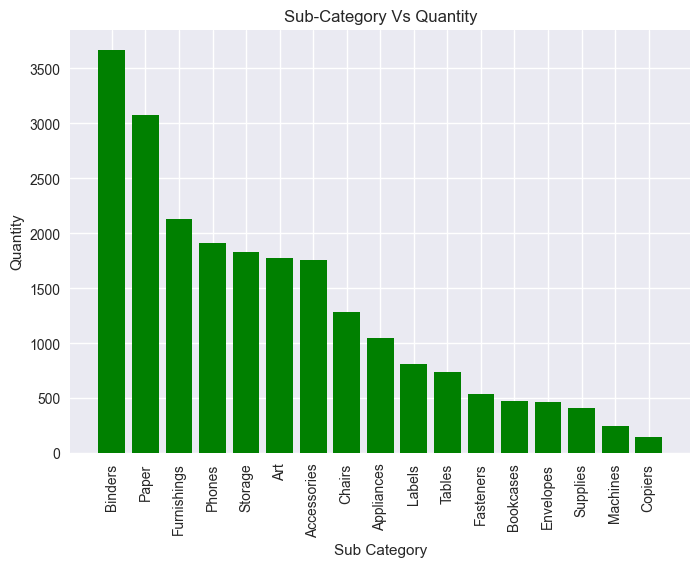

In [82]:
plt.bar(popular_sub_category["Sub-Category"],popular_sub_category["Quantity"],color="green")
plt.xticks(popular_sub_category["Sub-Category"],rotation="vertical")
plt.title("Sub-Category Vs Quantity")
plt.xlabel("Sub Category")
plt.ylabel("Quantity")
plt.show()

# What is the most Profitable Customer Segment

In [84]:
customer_segment=df.groupby("Segment").sum()
customer_segment=customer_segment.sort_values(by='Profit',ascending=False)
customer_segment.reset_index(inplace=True)
customer_segment

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\1113585792.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Segment,Sales,Quantity,Profit
0,Consumer,753002.1291,11199,81338.5875
1,Corporate,509743.1262,6865,57805.7991
2,Home Office,303059.0679,4253,36117.7193


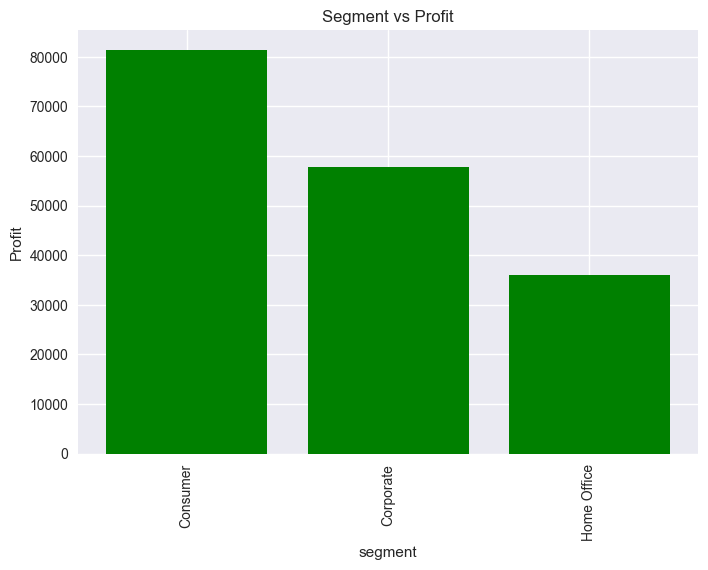

In [85]:
plt.bar(customer_segment['Segment'],customer_segment['Profit'],color='green')
plt.xticks(customer_segment['Segment'],rotation='vertical')
plt.title("Segment vs Profit")
plt.xlabel("segment")
plt.ylabel("Profit")
plt.show()

<AxesSubplot: ylabel='Profit'>

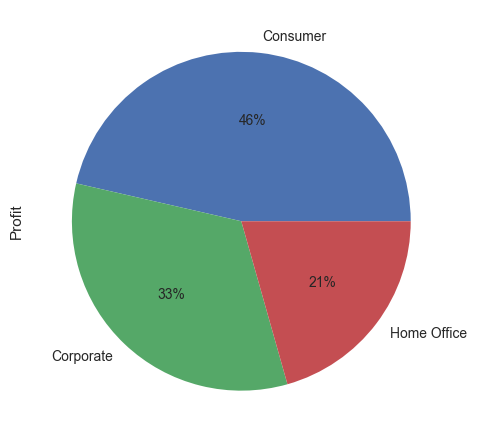

In [94]:
df.groupby("Segment")["Profit"].sum().plot.pie(autopct="%1.0f%%")

# Which Ship Mode have more Sales Volume and Profit 

In [89]:
Sales_Volume=pd.DataFrame(df.groupby('Ship Mode').sum())
Sales_Volume=Sales_Volume.sort_values(by='Sales',ascending=False)
Sales_Volume.reset_index(inplace=True)
Sales_Volume

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\150725669.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Ship Mode,Sales,Quantity,Profit
0,Standard Class,912401.0388,13150,99767.3886
1,Second Class,314508.0640,4392,36936.0265
2,First Class,242936.7194,3554,29749.8665
3,Same Day,95958.5010,1221,8808.8243


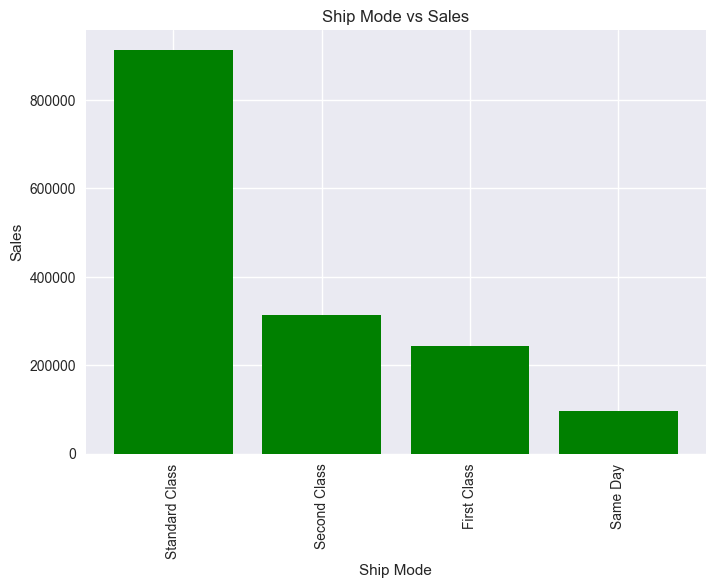

In [91]:
plt.bar(Sales_Volume['Ship Mode'],Sales_Volume['Sales'],color='green')
plt.xticks(Sales_Volume['Ship Mode'],rotation='vertical')
plt.title("Ship Mode vs Sales")
plt.xlabel("Ship Mode")
plt.ylabel('Sales')
plt.show()

In [92]:
Sales_Profit=df.groupby('Ship Mode').sum()
Sales_Profit=Sales_Profit.sort_values(by='Profit',ascending=False)
Sales_Profit.reset_index(inplace=True)
Sales_Profit

C:\Users\ashis\AppData\Local\Temp\ipykernel_9428\3117912718.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



,Ship Mode,Sales,Quantity,Profit
0,Standard Class,912401.0388,13150,99767.3886
1,Second Class,314508.0640,4392,36936.0265
2,First Class,242936.7194,3554,29749.8665
3,Same Day,95958.5010,1221,8808.8243


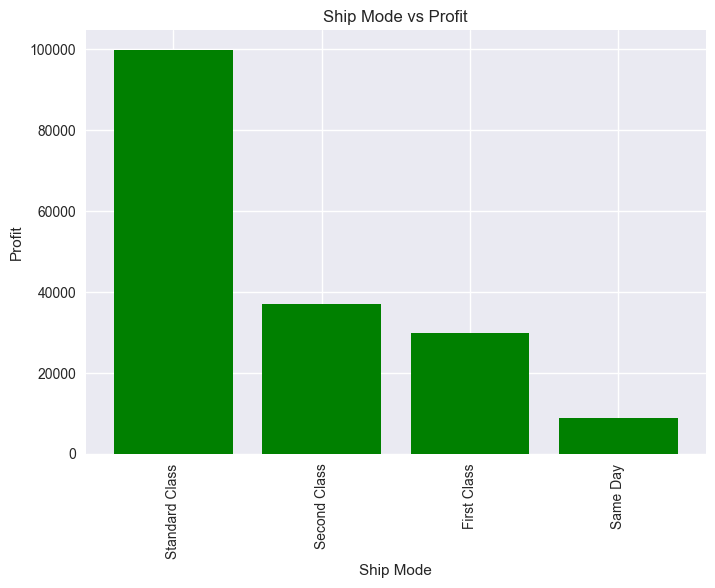

In [93]:
plt.bar(Sales_Volume['Ship Mode'],Sales_Volume['Profit'],color='green')
plt.xticks(Sales_Volume['Ship Mode'],rotation='vertical')
plt.title("Ship Mode vs Profit")
plt.xlabel("Ship Mode")
plt.ylabel('Profit')
plt.show()

<AxesSubplot: ylabel='Sales'>

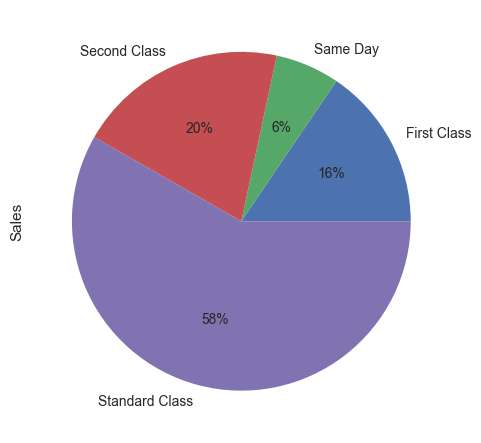

In [97]:
(df.groupby("Ship Mode")["Sales"].sum().plot.pie(autopct="%1.0f%%"))

<AxesSubplot: ylabel='Profit'>

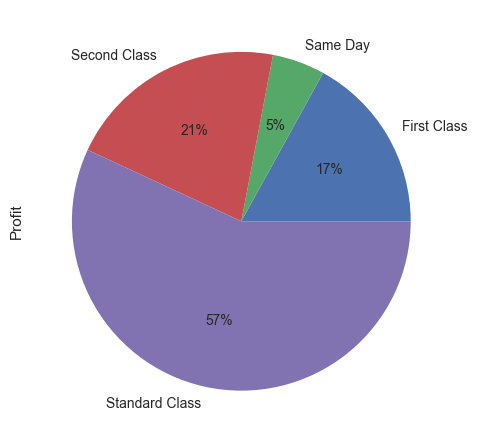

In [98]:
(df.groupby("Ship Mode")["Profit"].sum().plot.pie(autopct="%1.0f%%"))

# Sales by Payment Mode

<AxesSubplot: ylabel='Sales'>

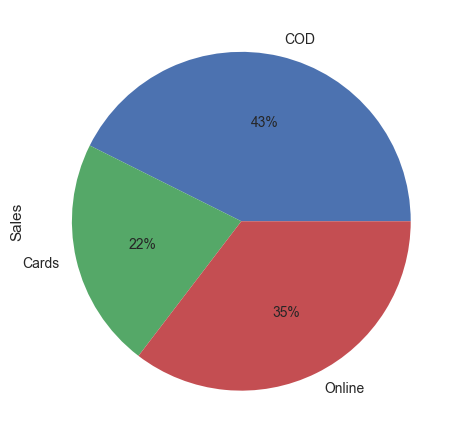

In [99]:
(df.groupby("Payment Mode")["Sales"].sum().plot.pie(autopct="%1.0f%%"))